# WEATHERPY

---

#### Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


### PART 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude


#### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import requests
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Print out the response for debugging
        print(city_weather)
        # Check if 'coord' key exists in the response
        if 'coord' in city_weather:
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the City information into city_data list
            city_data.append({"City": city,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"Coordinates not found for {city}. Skipping...")
    # If an error is experienced, skip the city
    except requests.exceptions.RequestException as e:
        print("City not found. Skipping...")
        print(e)
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | palembang
{'coord': {'lon': 104.7458, 'lat': -2.9167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.05, 'feels_like': 35.79, 'temp_min': 29.05, 'temp_max': 29.05, 'pressure': 1010, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 260}, 'clouds': {'all': 75}, 'dt': 1712632198, 'sys': {'type': 1, 'id': 9424, 'country': 'ID', 'sunrise': 1712617234, 'sunset': 1712660649}, 'timezone': 25200, 'id': 1633070, 'name': 'Palembang', 'cod': 200}
Processing Record 2 of Set 1 | yekaterinburg
{'coord': {'lon': 60.6125, 'lat': 56.8575}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 2.77, 'feels_like': -1.45, 'temp_min': 2.77, 'temp_max': 2.77, 'pressure': 1005, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 5, 'deg': 290}

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,palembang,-2.9167,104.7458,29.05,84,75,1.54,ID,2024-04-09 03:09:58
1,yekaterinburg,56.8575,60.6125,2.77,93,100,5.00,RU,2024-04-09 03:07:56
2,badger,64.8000,-147.5333,2.14,66,75,5.66,US,2024-04-09 03:09:58
3,qaqortoq,60.7167,-46.0333,-4.87,89,100,2.07,GL,2024-04-09 03:09:58
4,port mathurin,-19.6833,63.4167,26.67,78,59,3.24,MU,2024-04-09 03:09:58
5,isafjordur,66.0755,-23.1240,-4.52,89,100,6.98,IS,2024-04-09 03:05:20
6,port-aux-francais,-49.3500,70.2167,8.14,87,100,16.47,TF,2024-04-09 03:09:58
7,albany,42.6001,-73.9662,11.07,63,78,1.34,US,2024-04-09 03:06:25
8,el calafate,-50.3408,-72.2768,2.12,72,14,3.60,AR,2024-04-09 03:07:14
9,baharly,38.4362,57.4316,16.52,61,63,3.07,TM,2024-04-09 03:09:59


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palembang,-2.9167,104.7458,29.05,84,75,1.54,ID,2024-04-09 03:09:58
1,yekaterinburg,56.8575,60.6125,2.77,93,100,5.00,RU,2024-04-09 03:07:56
2,badger,64.8000,-147.5333,2.14,66,75,5.66,US,2024-04-09 03:09:58
3,qaqortoq,60.7167,-46.0333,-4.87,89,100,2.07,GL,2024-04-09 03:09:58
4,port mathurin,-19.6833,63.4167,26.67,78,59,3.24,MU,2024-04-09 03:09:58


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

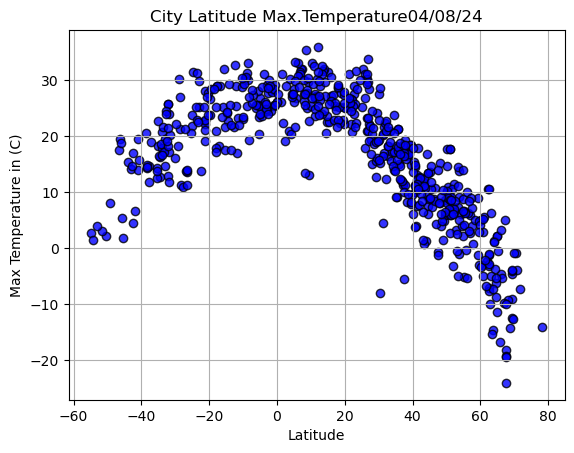

In [8]:
# Scatter plot for latitude vs. temperature
import time
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]

plt.scatter(lats,max_temps, linewidths=1, edgecolor = 'black',color = 'b', marker='o', alpha=0.8,label="cities")

plt.title(f"City Latitude Max.Temperature" + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel ("Max Temperature in (C)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

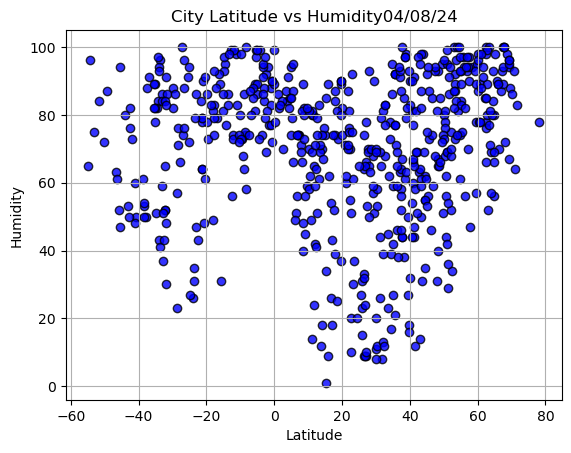

In [9]:
# Scatter plots for latitude vs. humidity

import time
lats = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.scatter(lats,humidity, linewidths=1, edgecolor = 'black',color = 'b', marker='o', alpha=0.8,label="cities")

plt.title(f"City Latitude vs Humidity" + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel ("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudness

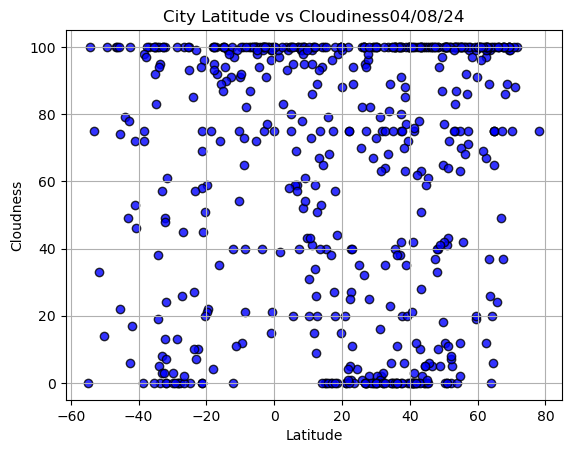

In [10]:
#Extract fields relevant from DataFrame for plotting
cloudness = city_data_df["Cloudiness"]
lats = city_data_df["Lat"]

# Scatter plots for latitude vs. cloudiness
plt.scatter(lats,cloudness, linewidths=1, edgecolor = 'black',color = 'b', marker='o', alpha=0.8,label="cities")

plt.title(f"City Latitude vs Cloudiness" + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel ("Cloudness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

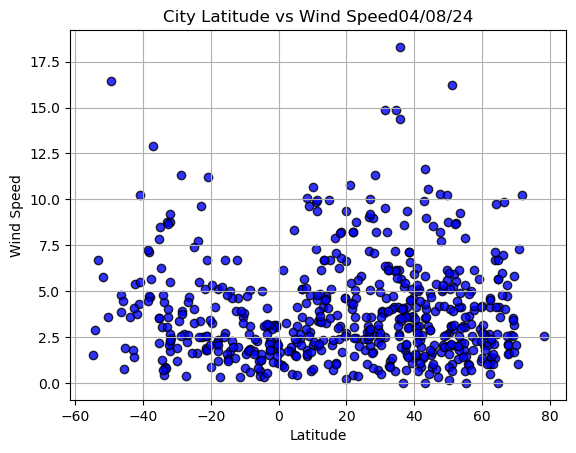

In [11]:
#Extract fields relevant from DataFrame for plotting
wind_speed = city_data_df["Wind Speed"]
lats = city_data_df["Lat"]

# Create scatter plots for latitude vs. wind speed
plt.scatter(lats,wind_speed, linewidths=1, edgecolor = 'black',color = 'b', marker='o', alpha=0.8,label="cities")

plt.title(f"City Latitude vs Wind Speed" + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel ("Wind Speed")
plt.grid(True)



# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

### Part 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


def plot_linear_regression(x_values, y_values, title, y_lable, text_coordinantes):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_value = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #rvalue = pearsonr(x_values,y_values)
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_value,"r-")
    plt.annotate(line_eq,text_coordinantes,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_lable)
    plt.title(title)
    
    # Save the figure
    plt.savefig(f'output_data/{title}.png')
    plt.show()

    print(f"The r-value is:",rvalue)


Northern Hemispere 

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df ["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,yekaterinburg,56.8575,60.6125,2.77,93,100,5.00,RU,2024-04-09 03:07:56
2,badger,64.8000,-147.5333,2.14,66,75,5.66,US,2024-04-09 03:09:58
3,qaqortoq,60.7167,-46.0333,-4.87,89,100,2.07,GL,2024-04-09 03:09:58
5,isafjordur,66.0755,-23.1240,-4.52,89,100,6.98,IS,2024-04-09 03:05:20
7,albany,42.6001,-73.9662,11.07,63,78,1.34,US,2024-04-09 03:06:25


Southern Hemispere

In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df ["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,palembang,-2.9167,104.7458,29.05,84,75,1.54,ID,2024-04-09 03:09:58
4,port mathurin,-19.6833,63.4167,26.67,78,59,3.24,MU,2024-04-09 03:09:58
6,port-aux-francais,-49.3500,70.2167,8.14,87,100,16.47,TF,2024-04-09 03:09:58
8,el calafate,-50.3408,-72.2768,2.12,72,14,3.60,AR,2024-04-09 03:07:14
10,atafu village,-8.5421,-172.5159,30.09,74,21,5.06,TK,2024-04-09 03:09:59


###  Temperature vs. Latitude Linear Regression Plot

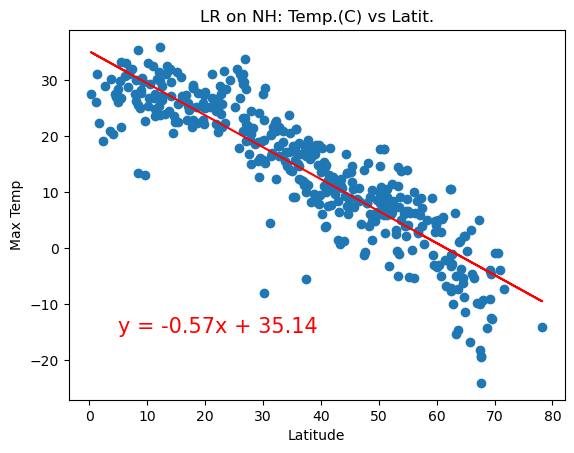

The r-value is: -0.8893571515594824


In [15]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]


plot_linear_regression(x_value,y_value,'LR on NH: Temp.(C) vs Latit.', 'Max Temp',(5,-15))


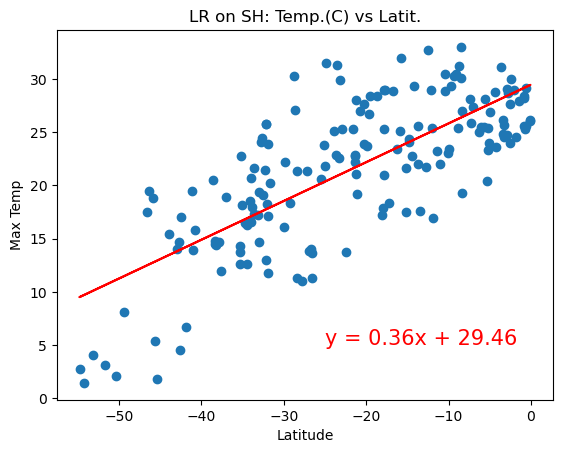

The r-value is: 0.7506900043083881


In [16]:
# Linear regression on Souther Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]


plot_linear_regression(x_value,y_value,'LR on SH: Temp.(C) vs Latit.', 'Max Temp',(-25,5))


**Discussion about the linear relationship:** 

Analysing northern hemisphere - the north you go from equador max. temperature is decreasing(it is getting colder). It is also shown in colleration coefficient, r-value representing very strong negative colleration. 
Looking into southern hemisphere r-value indicates very strong positive correlation between max. temperature and latitude. It shows that moving closer to equador, max.temperature is increasing. 

###  Humidity vs. Latitude Linear Regression Plot

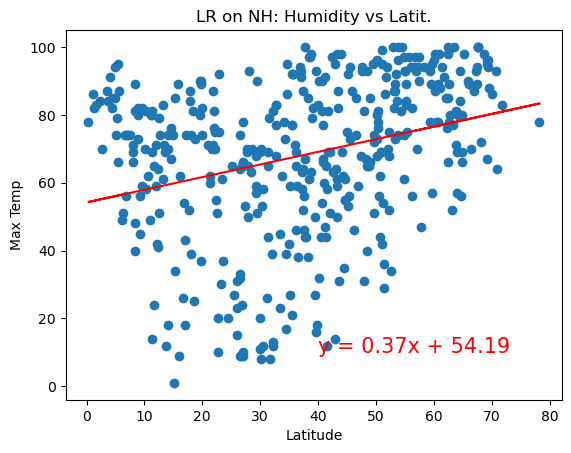

The r-value is: 0.2986324021827251


In [17]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]


plot_linear_regression(x_value,y_value,'LR on NH: Humidity vs Latit.', 'Max Temp',(40,10))


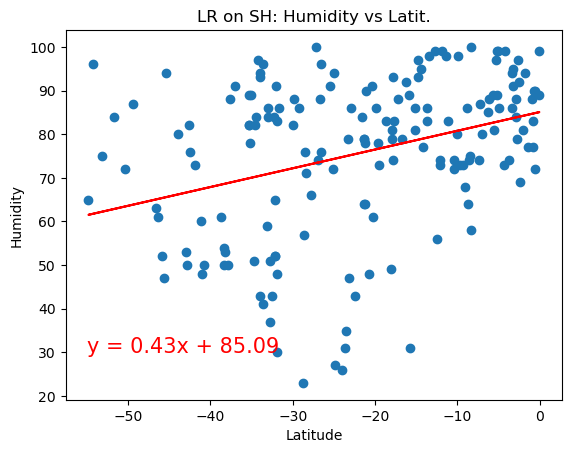

The r-value is: 0.33835714255209093


In [18]:
# Linear regression on Souther Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]


plot_linear_regression(x_value,y_value,'LR on SH: Humidity vs Latit.', 'Humidity',(-55,30))



**Discussion about the linear relationship:** 

Looking into humidity and latitude colleration in northern hemisphere r_value shows that there is noticable positive colleration. It tells us that humidity is increasing as you go more north. While in south hemisphere r_value shows that there is noticable positive relationship betweem them. 


###  Cloudiness vs. Latitude Linear Regression Plot

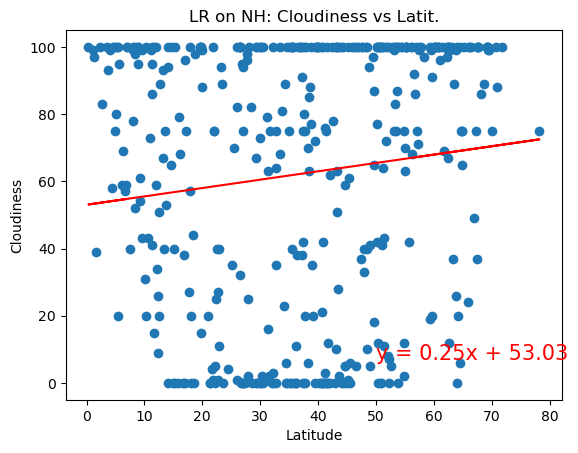

The r-value is: 0.1180282418404233


In [19]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]


plot_linear_regression(x_value,y_value,'LR on NH: Cloudiness vs Latit.', 'Cloudiness',(50,7))


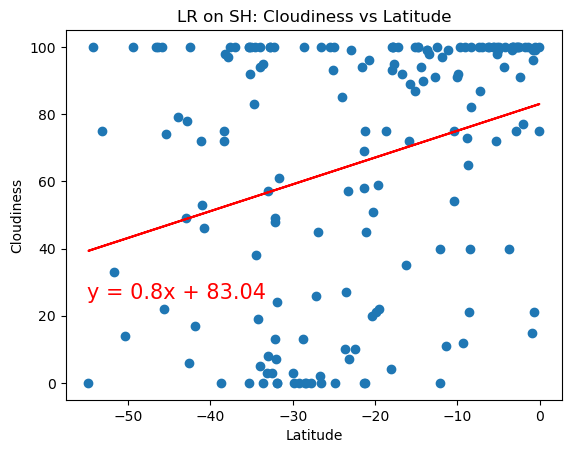

The r-value is: 0.29716473173384844


In [20]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]


plot_linear_regression(x_value,y_value,'LR on SH: Cloudiness vs Latitude', 'Cloudiness',(-55,25))


**Discussion about the linear relationship:** 

Cloudiness and latitude colleration in both northern and southern hemisphere is less than 0.3, which represents weak positive colleration. The correlation coefficient for south is a bit higher and it shows that going closer to equador cloudinnes is higher. 

###  Wind Speed vs. Latitude Linear Regression Plot

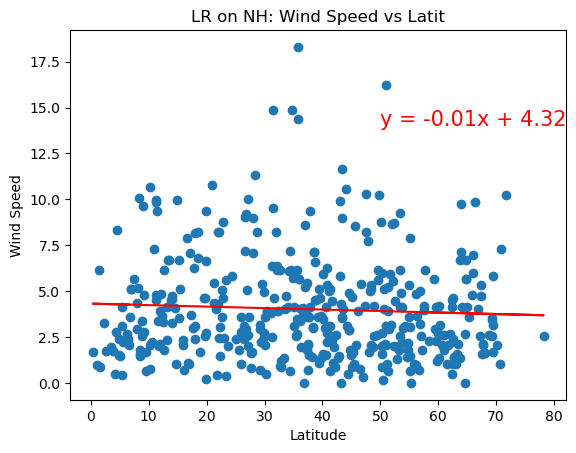

The r-value is: -0.05372886068112164


In [21]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]


plot_linear_regression(x_value,y_value,'LR on NH: Wind Speed vs Latit', 'Wind Speed',(50,14))


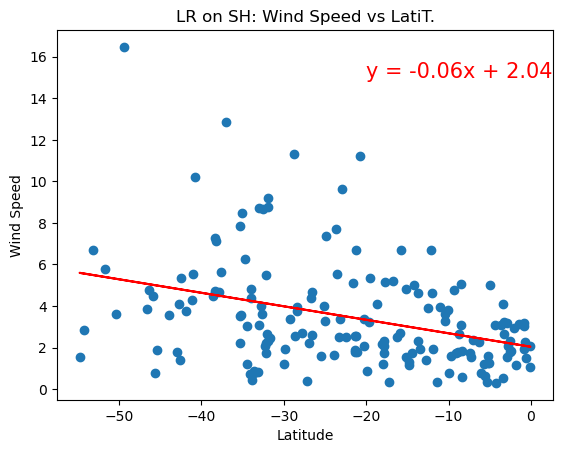

The r-value is: -0.36034356654782224


In [22]:
# Linear regression on Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_value,y_value,'LR on SH: Wind Speed vs LatiT.', 'Wind Speed',(-20,15))


**Discussion about the linear relationship:** 

Wind speed and latitude colleration in northern hemisphere shows no meaningful relationship betweem them, while in southern hemisphere r_value is negative and shows noticeable relationship between those two variables. It shows that moving closer to equador, wind speed is decreasing.